##  코드 작성일은 21대 총선 전이기 때문에 인구수를 시각화

In [68]:
import platform

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [69]:
BORDER_LINES = [
    [[4, 6, 6, 8, 8, 11, 11, 12, 12, 13, 13, 14, 14, 13, 13, 9, 9, 6, 6, 4],
     [6, 6, 4, 4, 2, 2, 3, 3, 5, 5, 6, 6, 7, 7, 9, 9, 10, 10, 8, 8]], # 서울
    [[7, 7, 11, 11, 12, 12, 13, 13, 14, 14, 13, 13, 12, 12, 11, 11, 7],
    [0, 1, 1, 2, 2, 3, 3, 5, 5, 3, 3, 2, 2, 1, 1, 0, 0]], #강원
    [[3, 3, 2, 2, 4, 4, 6, 6, 8, 8, 4, 4, 3],
     [2, 3, 3, 5, 5, 6, 6, 4, 4, 3, 3, 2, 2]], # 인천
    [[4, 4, 6, 6, 7],[2, 0, 0, 1, 1]], # 경기 1
    [[14, 15, 15, 16, 16, 15, 15, 14, 14, 11, 11, 4, 4, 3, 3, 2, 2, 1, 1, 2, 2, 4],
     [5, 5, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 10, 10, 9, 9, 8, 8, 7, 7, 6, 6]], # 경기2
    [[4, 4, 6, 6], [12, 13, 13, 12]], # 세종
    [[4, 1, 1, 2, 2, 3, 3, 5, 5, 4, 4, 5, 5, 4, 4],
     [12, 12, 14, 14, 15, 15, 16, 16, 15, 15, 14, 14, 13, 13, 12]], # 충남
    [[5, 8, 8, 6, 4], [16, 16, 14, 14, 14]], #대전
    [[6, 10, 10, 9, 9, 8], [12, 12, 13, 13, 14, 14]], # 충북
    [[15, 17, 17, 16, 16, 15, 15, 14, 14, 11, 11, 12, 12, 13, 13, 14, 14],
     [10, 10, 11, 11, 12, 12, 14, 14, 15, 15, 14, 14, 13, 13, 12, 12, 11]], # 경북
    [[11, 11, 14, 14], [15, 17, 17, 15]],# 울산
    [[8,11],[15,15]], # 경남
    [[6, 6, 9, 9],[23, 22, 22, 23]], # 제주
    [[11, 14, 14, 13, 13, 12, 12, 11, 11, 6, 6, 7, 7, 8, 8, 11, 11],
     [17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 20, 20, 19, 19, 18, 18, 17]], # 부산
    [[2, 2, 0, 0, 1, 1, 2, 2, 3, 3, 6, 6], [15, 16, 16, 17, 17, 19, 19, 18, 18, 17, 17, 16]], # 전북
    [[6, 7, 7, 6, 6, 5], [17, 17, 18, 18, 19, 19]], #광주
    [[1, 1, 2, 2, 1, 1, 4, 4, 5, 5, 1], [19, 20, 20, 21, 21, 22, 22, 21, 21, 19, 19]], #전남
    [[5,6],[20,20]] # 잔선
]

In [70]:
election_map = pd.read_excel('../data/korea_map_21th_election_type_b_display_name.xlsx')
election_voter = pd.read_excel('../data/korea_voter_21th_election.xlsx')

In [71]:
election_map.head()

,Unnamed: 0,X,Y,선거구명,표기이름,시도명
0,0,0,16,군산시,군산,전북
1,1,1,7,안산시상록구을,안산 상록\n을,경기
2,2,1,12,당진시,당진,충남
3,3,1,13,서산시태안군,서산 태안,충남
4,4,1,16,전주시갑,전주 갑,전북


In [72]:
election_voter.head()

,선거구명,유권자 수,광역시도명,시도명
0,전주시갑,171863,전라북도,전북
1,전주시을,199526,전라북도,전북
2,전주시병,284058,전라북도,전북
3,군산시,268750,전라북도,전북
4,익산시갑,136377,전라북도,전북


In [73]:
# 데이터 결합
election = pd.merge(election_map, election_voter)
election.head()

,Unnamed: 0,X,Y,선거구명,표기이름,시도명,유권자 수,광역시도명
0,0,0,16,군산시,군산,전북,268750,전라북도
1,1,1,7,안산시상록구을,안산 상록\n을,경기,149636,경기도
2,2,1,12,당진시,당진,충남,166381,충청남도
3,3,1,13,서산시태안군,서산 태안,충남,237024,충청남도
4,4,1,16,전주시갑,전주 갑,전북,171863,전라북도


In [74]:
# 결측치 조회
election[election['유권자 수'].isnull()]

,Unnamed: 0,X,Y,선거구명,표기이름,시도명,유권자 수,광역시도명


In [80]:
def draw(data, cmapname, col):
    gamma = 0.75
    whitelabelmin = 20.

    mapdata = data.pivot_table(index='Y', columns='X', values='유권자 수')
    
    plt.figure(figsize=(20, 20))
    plt.pcolor(mapdata, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    for idx, row in election.iterrows():
        
        name = row[col]
        plt.annotate(name, (row['X']+0.5, row['Y']+0.5), weight='bold',
                     fontsize=15, ha='center', va='center', color='black')

    for path in BORDER_LINES:
        x, y = path
        plt.plot(x, y, c='black', lw=3)
        
    plt.gca().invert_yaxis()

    #cb = plt.colorbar(shrink=.1, aspect=10)
    #cb.set_label()

    plt.axis('off')
    plt.tight_layout()
    plt.show()
    

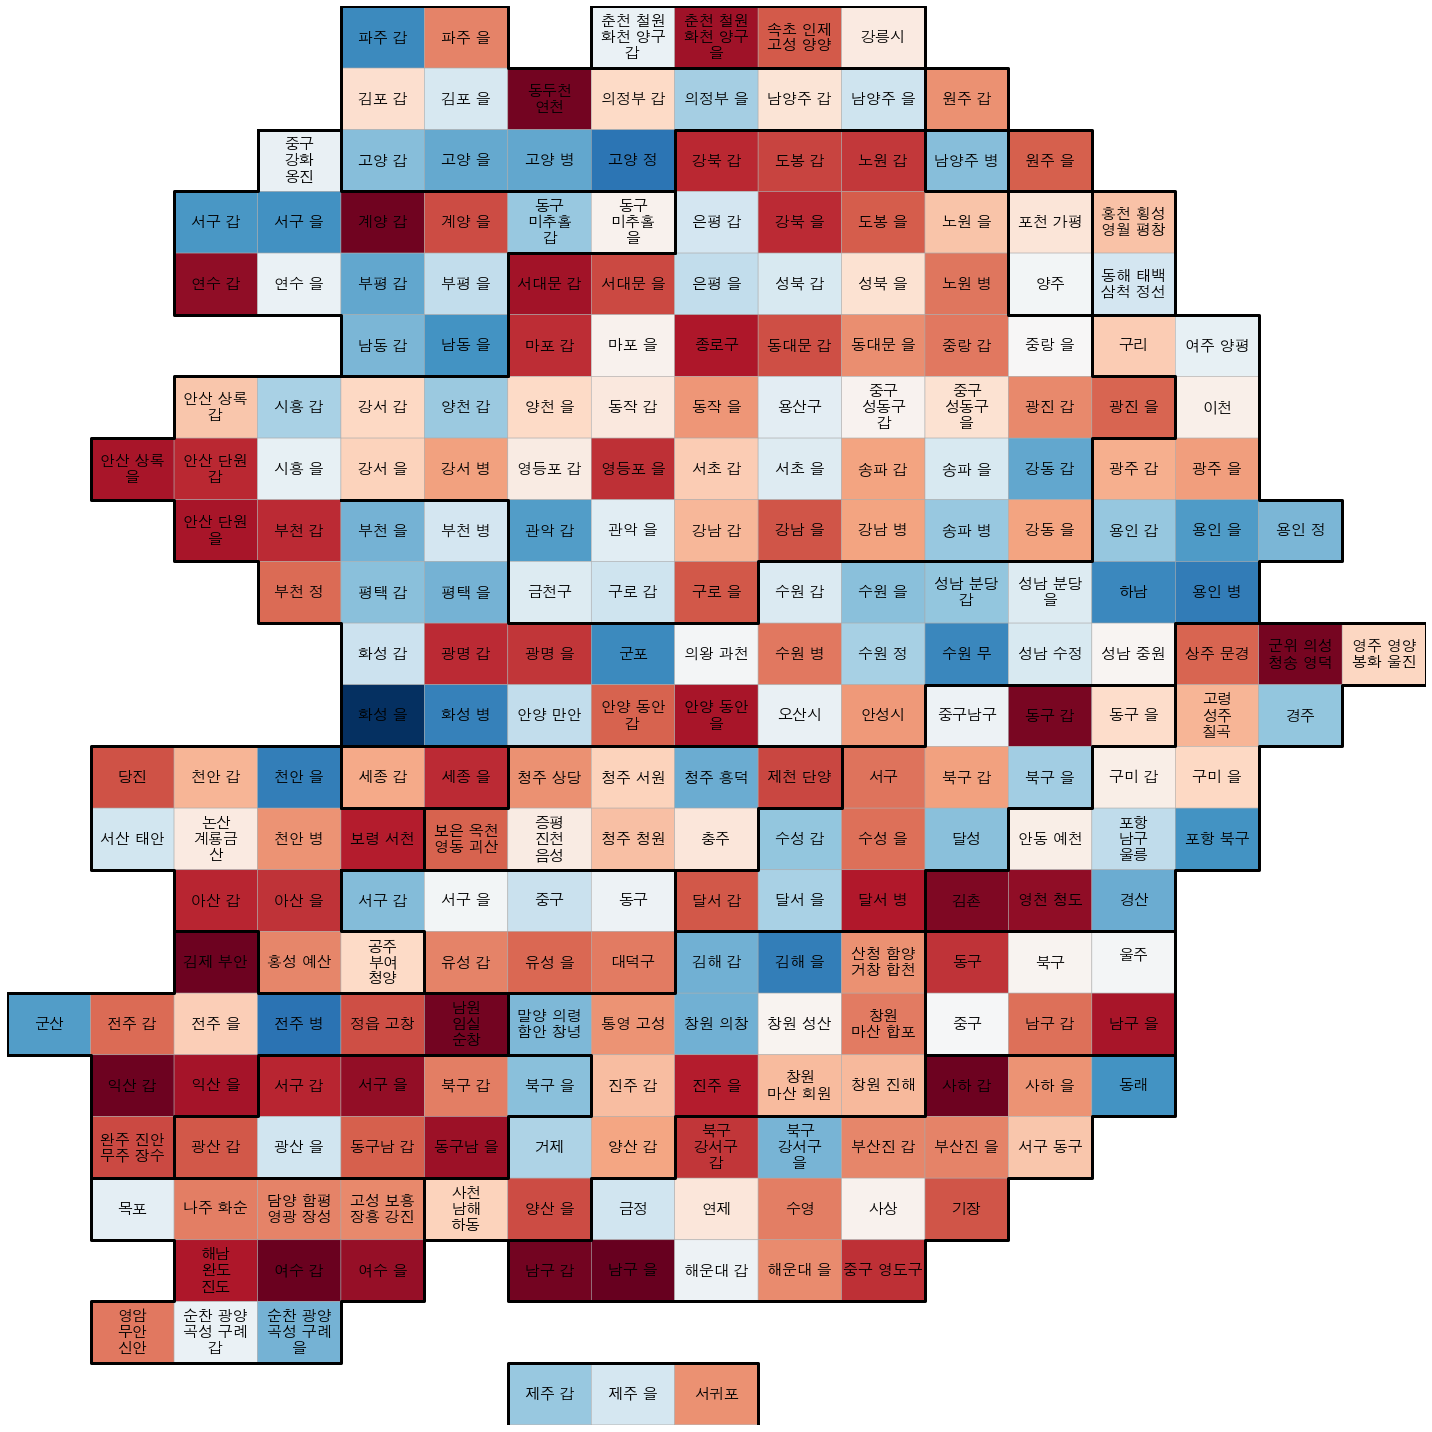

In [81]:
draw(election, 'RdBu', '표기이름')

In [82]:
def draw2(data, cmapname, col):
    gamma = 0.75
    whitelabelmin = 20.

    mapdata = data.pivot_table(index='Y', columns='X', values='SUCCESSFUL', aggfunc='first')

    plt.figure(figsize=(20, 20))
    plt.pcolor(mapdata, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    for idx, row in election.iterrows():
        plt.annotate(row[col], (row['X']+0.5, row['Y']+0.5), fontsize=15, ha='center', va='center', color='black')

    for path in BORDER_LINES:
        x, y = path
        plt.plot(x, y, c='black', lw=3)
    
    #cb = plt.colorbar(shrink=.1, aspect=10)
    #cb.set_label()
    
    plt.gca().invert_yaxis()

    plt.axis('off')
    plt.tight_layout()
    plt.show()
    

In [83]:
successful = election.copy()

color = [i * 1.25 for i in range(len(successful['시도명'].unique()))]

for sido in successful['시도명'].unique():
    successful.loc[successful['시도명'] == sido, 'SUCCESSFUL'] = color[list(successful['시도명'].unique()).index(sido)]

successful

,Unnamed: 0,X,Y,선거구명,표기이름,시도명,유권자 수,광역시도명,SUCCESSFUL
0,0,0,16,군산시,군산,전북,268750,전라북도,0.00
1,1,1,7,안산시상록구을,안산 상록\n을,경기,149636,경기도,1.25
2,2,1,12,당진시,당진,충남,166381,충청남도,2.50
3,3,1,13,서산시태안군,서산 태안,충남,237024,충청남도,2.50
4,4,1,16,전주시갑,전주 갑,전북,171863,전라북도,0.00
...,...,...,...,...,...,...,...,...,...
248,272,14,13,포항시북구,포항 북구,경북,272548,경상북도,20.00
249,273,15,8,용인시정,용인 정,경기,260109,경기도,1.25
250,274,15,10,군위군의성군청송군영덕군,군위 의성\n청송 영덕,경북,138496,경상북도,20.00
251,275,15,11,경주시,경주,경북,254515,경상북도,20.00


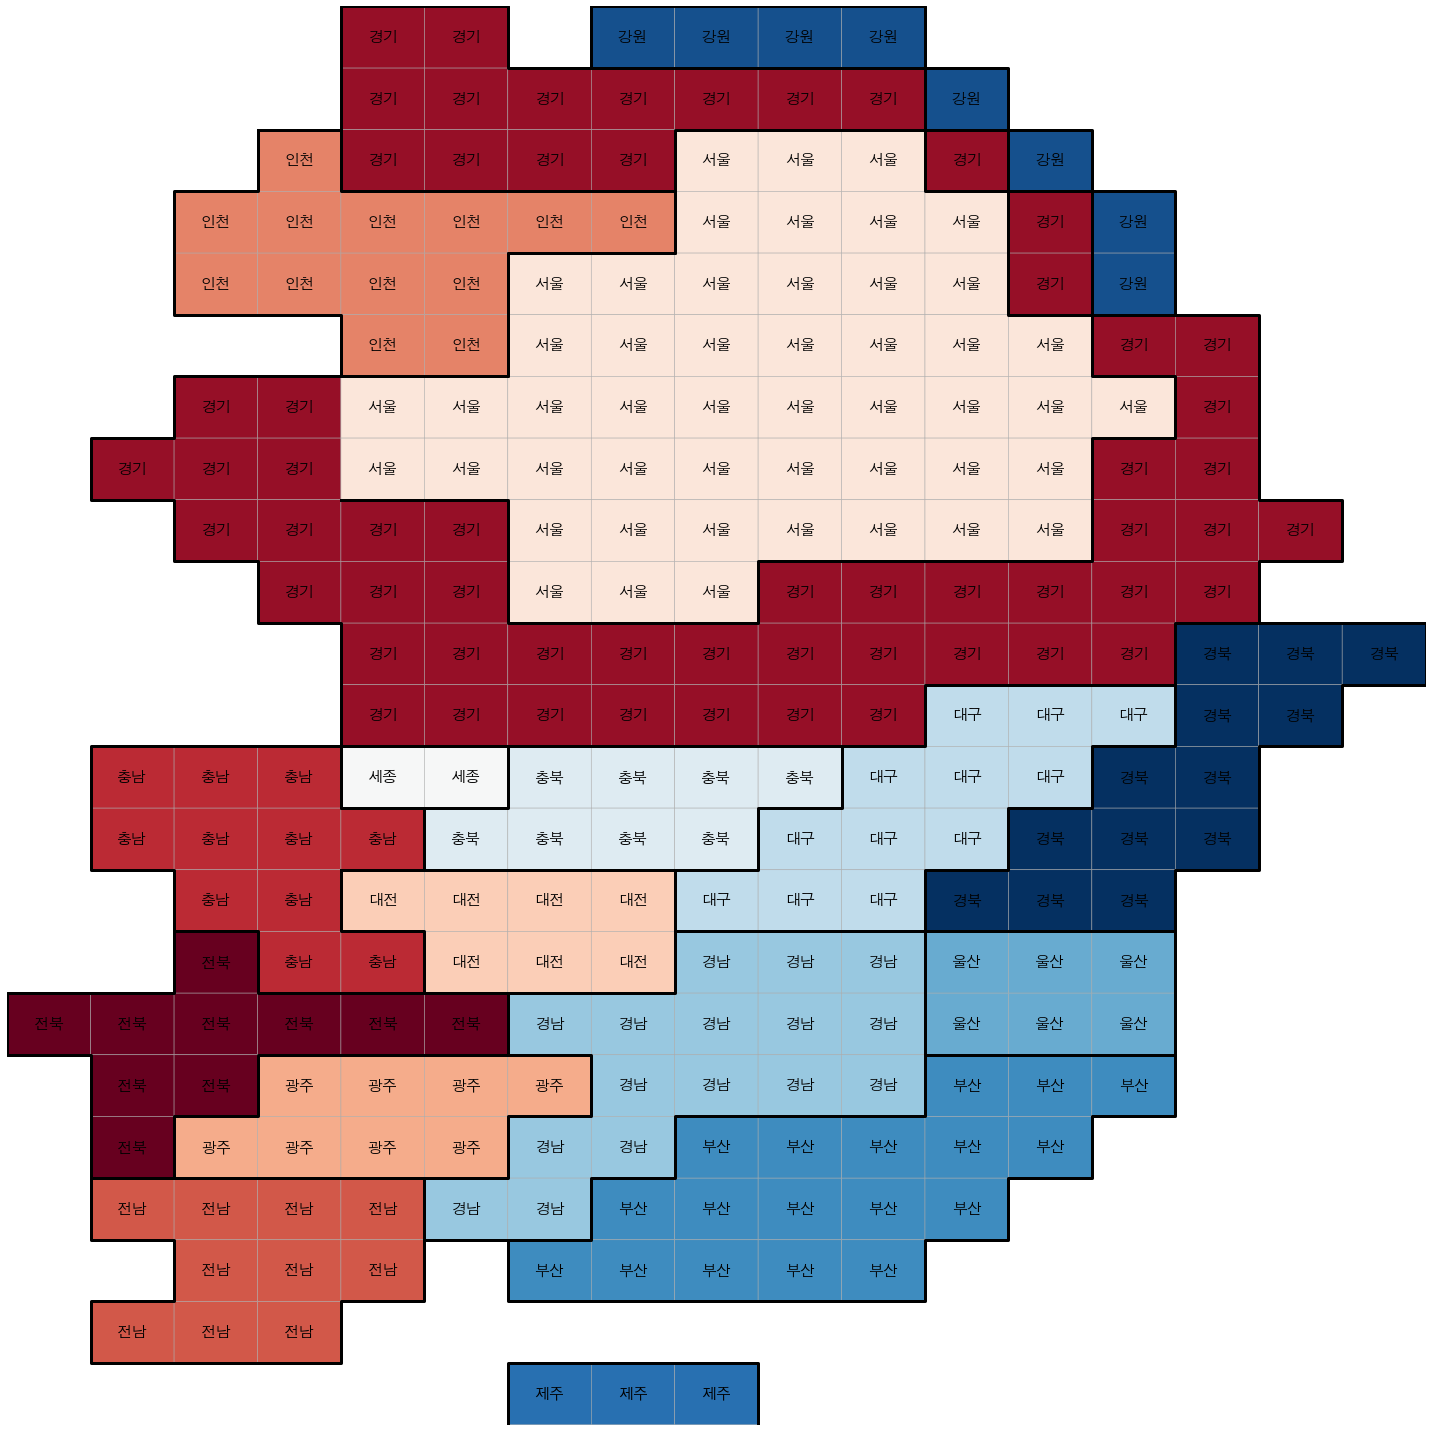

In [84]:
draw2(successful, 'RdBu', '시도명')